In [1]:
!pip install scikit-learn pandas numpy matplotlib ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sklearn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import *

from ucimlrepo import fetch_ucirepo 

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd

In [3]:
# Run this in a notebook cell
import sys
print(sys.executable)


c:\Users\ssrak\OneDrive - The Pennsylvania State University\DS 310\Honors Project\venv\Scripts\python.exe


### EDA

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=17) 

# need this to graph later
df = breast_cancer_wisconsin_original.data.original
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [5]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [7]:
y['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


## Preprocessing the Data

In [9]:
#Normalizing the Data
pd.options.mode.chained_assignment = None


X_normalized = X

#I normalized the data by column using the l2 normalization
X_normalized = preprocessing.normalize(X, norm='l2', axis=0) # Column
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)



In [10]:
#I am checking whether any of the data is null
print(X.isnull().sum())
#based upon the output of the training data, there are no null values
X.fillna(X.mean(), inplace=True)  #using imputations to fill the null data

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [11]:
#Visualizing the normalized
X_normalized.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.051800,0.022019,0.054122,0.056456,0.050972,0.099531,0.105467,0.098797,0.055348,0.052217,...,0.062695,0.027518,0.068855,0.080738,0.050624,0.093343,0.087052,0.084232,0.065034,0.058052
1,0.059229,0.037695,0.058573,0.074786,0.036481,0.028196,0.030540,0.047128,0.041460,0.037595,...,0.061732,0.037172,0.059232,0.078218,0.038639,0.026169,0.029543,0.059032,0.038871,0.043463
2,0.056695,0.045078,0.057295,0.067849,0.047183,0.057331,0.069374,0.085901,0.047340,0.039798,...,0.058224,0.040539,0.056882,0.068341,0.045068,0.059531,0.055076,0.077122,0.051069,0.042760
3,0.032883,0.043232,0.034192,0.021776,0.061347,0.101790,0.084838,0.070655,0.059421,0.064642,...,0.036832,0.042079,0.036878,0.022702,0.065480,0.121489,0.083995,0.081724,0.093827,0.084466
4,0.058423,0.030419,0.059543,0.073150,0.043179,0.047614,0.069585,0.070051,0.041391,0.039028,...,0.055680,0.026470,0.056770,0.062983,0.042883,0.028749,0.048913,0.051574,0.033415,0.037487


In [12]:
#creating smaller subset of data frame seperated by target class (malignant vs benign)
#benign tumors
benign = df[df["Diagnosis"] == 'B']
#malignant tumors
malignant= df[df["Diagnosis"] == 'M']

In [13]:
target_name = y["Diagnosis"].unique() #diagnosis is the type of target we are trying ot identify with the decision
target_name = list(target_name) #sending the target names to a variable
#for this dataset, I am using B and M to designate as malignant or benign

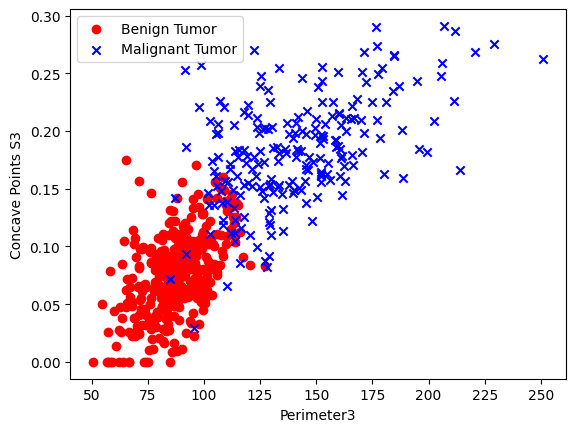

In [14]:
#uSing the columns of perimeter3 vs Concave Points from the subset dataframes
#these two features remove the most entropy from the decision tree 
#visualizing certain features of the data based on what might be most correlated wtih the target 
#uSing the columns of perimeter3 vs Concave Points from the subset dataframes
#these two features remove the most entropy from the decision tree 
plt.scatter(benign['perimeter3'], benign['concave_points3'], color='red', marker='o', label='Benign Tumor')
plt.scatter(malignant['perimeter3'], malignant['concave_points3'], color='blue', marker='x', label = 'Malignant Tumor')

plt.xlabel("Perimeter3")
plt.ylabel("Concave Points S3")
plt.legend(loc='upper left')

plt.show()

In [15]:
#I am using the normalized version of the data when splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.20, random_state = 887)
#splitting the training dataset into a 80, 20 split for 80% in training, and 20% testing

In [16]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 887, max_depth=1) #max depth one so only making the root node of the decision tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=887)

In [17]:
column_names = X.columns #extracting columns
feature_names = list(column_names)
print(feature_names) #finding the different characteristics of the data

['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


In [18]:
!pip install graphviz


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!where dot

C:\Users\ssrak\OneDrive - The Pennsylvania State University\Documents\Graphviz-12.2.1-win64\bin\dot.exe


## Decision Tree + Corresponding Graphics

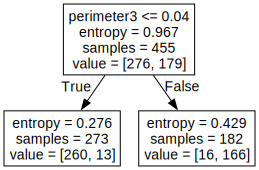

In [20]:
import graphviz #package to create differetn types of graphs

dot_data= tree.export_graphviz(clf, out_file=None, feature_names= feature_names)
graph = graphviz.Source(dot_data)
graph

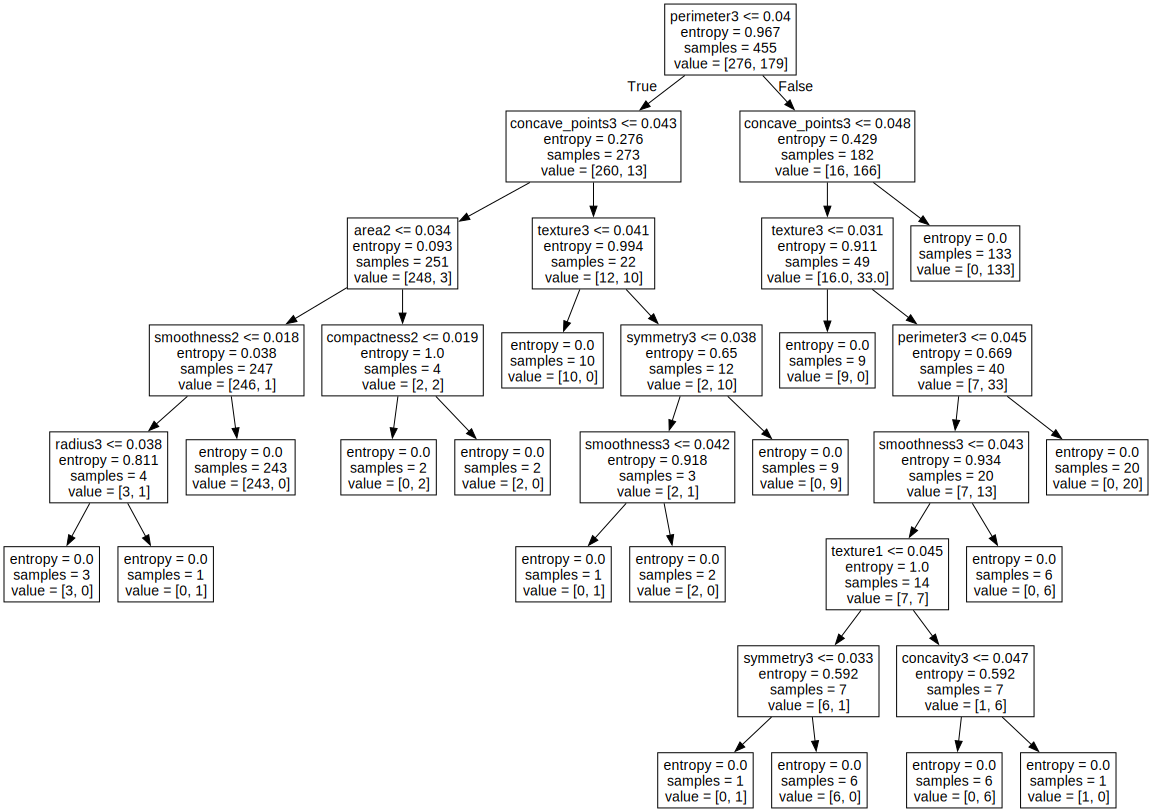

In [21]:
# Create a Decision Tree classifier using 'entropy' as the criterion for measuring information gain.
# No max_depth is set, so the tree will keep growing until leaves' entropy is zero
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 887) #no max depth - will go on until zero uncertainty/entropy
# Fit (train) the decision tree on the training data
clf.fit(X_train, y_train)

#exporting the decision tree to a different format for visualization
dot_data= tree.export_graphviz(clf, out_file=None, feature_names= feature_names)
graph = graphviz.Source(dot_data)
graph

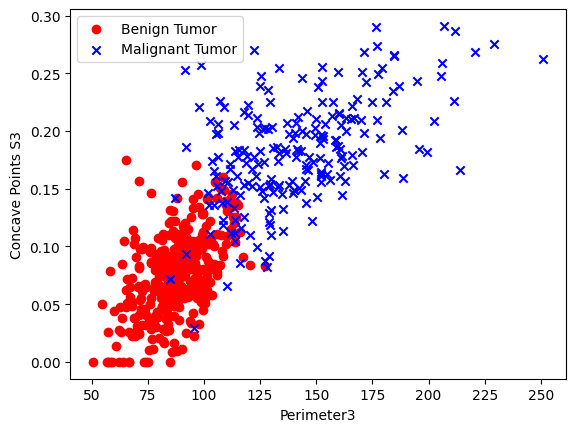

In [22]:
#uSing the columns of perimeter3 vs Concave Points from the subset dataframes
#these two features remove the most entropy from the decision tree 
plt.scatter(benign['perimeter3'], benign['concave_points3'], color='red', marker='o', label='Benign Tumor')
plt.scatter(malignant['perimeter3'], malignant['concave_points3'], color='blue', marker='x', label = 'Malignant Tumor')

plt.xlabel("Perimeter3")
plt.ylabel("Concave Points S3")
plt.legend(loc='upper left')

plt.show()

Can see that the bottom left has the most benign tumors
when the cell size uniformity is low  (below 6) and the cell clump thickness is lower as well, the tumors are most likely to be benign


### Performance Metrics

In [23]:
predicted_test = clf.predict(X_test)
#this is running prediction on the test data set to see how the deicsion tree performs

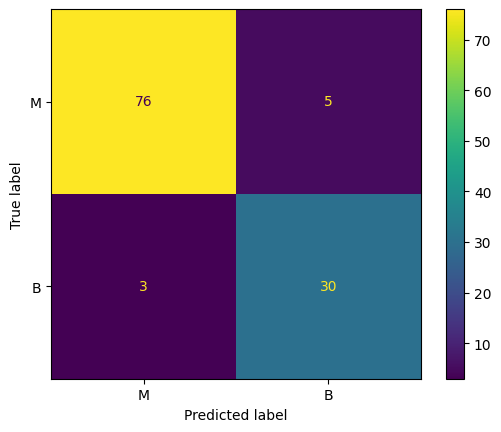

In [24]:
#Creating a Confusion Matrix based upon the decision tree classification and split of the data
cm = confusion_matrix(y_test, predicted_test) #creating confusion matrix with testing data and their predictions
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_name) #making this display
disp.plot()

From the confusion matrix, you can see that there are 76 true positives and 30 true negatives. The model correctly predicted 76 malignant tumors when the true label was malignant. The 30 true negatives show that the model correctly predicted benign tumors. There are 3 False Positives, meaning that the model predicted a malignant tumor, but the tumors were actually benign. There were a little more False negatives, where the model predicted benign, but the true labels is malignant - this may be more serious in medical settings. 

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_test)
print("Accuracy:", accuracy)



Accuracy: 0.9298245614035088


The accuracy 0.9298245614035088, however, this is not an entirely analyzing metric because if the classes are unbalanced, and there are 92 malignant out 100 samples, then the model will havea 92% accuracy if it randomly guesses that all tumors are malignant. 

# Using Multi Layer Perceptron To Train the Data

In [26]:

#A scalar transformation: 93.57% accuracy
#What this does is that it transforms our data so each feature has a mean = 0 and SD = 1
#it also does a fit transform so that it calculates the mean and SD of each feature in training data and applies the standardization formula to the data
#This leads to feature scaling, which leads to higher performance bc NN perform better when features are on a similar scale bc large differences might
#lead to more weight with features that are larger in value but not necessarily importance
#in addition, it also makes the model less sensetive to outliers, since outliers will be transformed to have values closer to the mean
#therefore, we output a higher accuracy

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


#Step 1: train/test split on original data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)


# Step 2: Fit the scaler on training data only, I am stnadardizing the features
# Apply scalar transformation using StandardScaler
# This standardizes features by removing the mean and scaling to unit variance (mean = 0, std = 1)
# It's especially effective for neural networks, as it ensures all features contribute equally 
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Encode target labels ('M' and 'B') into numeric values
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.ravel())
y_test_encoded = encoder.transform(y_test.values.ravel())  # ✅ Needed for accuracy comparison


# Set up the MLP classifier
# - tanh activation function works well with standardized data
# - hidden layers of size (64, 32)
# - alpha = 0.00001 applies light regularization
# - early_stopping = True stops training if no improvement is see
mlp = MLPClassifier(
    activation="tanh",
    hidden_layer_sizes=(64, 32),
    alpha=0.00001,
    learning_rate_init=0.01,
    max_iter=10000,
    early_stopping=True,
    random_state=1
)



# Train the model on the scaled and encoded data
mlp.fit(X_train_s, y_train_encoded)
y_pred = mlp.predict(X_test_s)

# This turns the encoded y-s back into their original labels.
#This is important for accuracy calculation
y_pred_original = encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_original)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 94.74%


### Performance Metrics for MLP

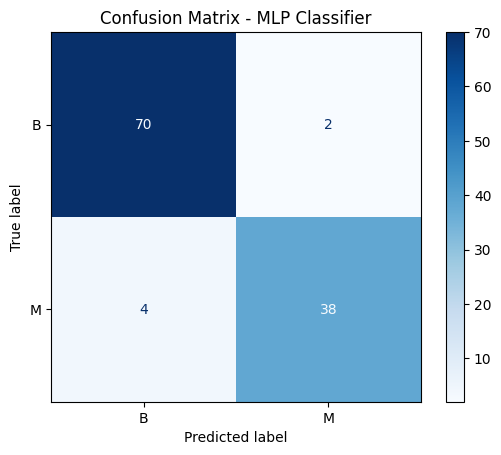

In [27]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_original, labels=encoder.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format='d')  # 'd' = integer formatting
plt.title("Confusion Matrix - MLP Classifier")
plt.show()

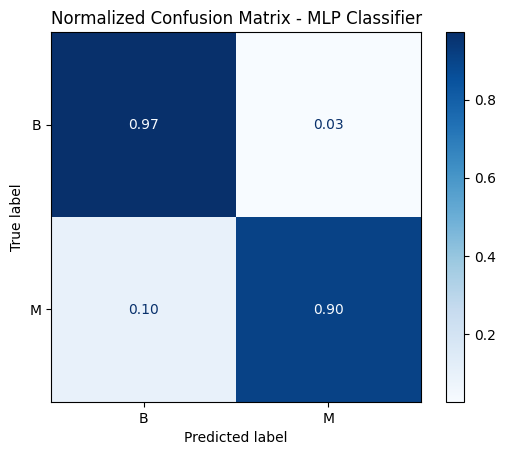

In [28]:
#Normalized confusion matrix
# Compute normalized confusion matrix (by row = actual class)
cm = confusion_matrix(y_test, y_pred_original, labels=encoder.classes_, normalize='true')

# Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format=".2f")  # Format values as decimal percentages
plt.title("Normalized Confusion Matrix - MLP Classifier")
plt.show()

Utilizing the MLP classifier gives an accuracy of 94.74%. Additionally, the MLP classifier's confusion matrix does better than the Decision Tree's classification. There is a 97% true positive rate of benign tumor prediction and true label. There is also a 90% true negative rate. The False positive rate is nd the false negative rate is 3%. 

# Random Forest to Train the Data

In [33]:
#Needed Packages for random forest
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

c:\Users\ssrak\OneDrive - The Pennsylvania State University\DS 310\Honors Project\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ssrak\OneDrive - The Pennsylvania State University\DS 310\Honors Project\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ssrak\OneDrive - The Pennsylvania State University\DS 310\Honors Project\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020243064590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020244205FA0>})

In [36]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 216}


In [ ]:
#fitting to random forest classifier based on the defined best hyperparameters
rf = RandomForestClassifier(max_depth= 10, n_estimators= 216)
rf.fit(X_train, y_train)

#running predictions on the created model
y_pred = rf.predict(X_test)

c:\Users\ssrak\OneDrive - The Pennsylvania State University\DS 310\Honors Project\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


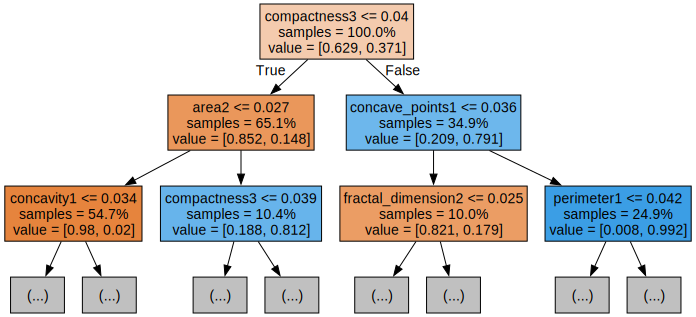

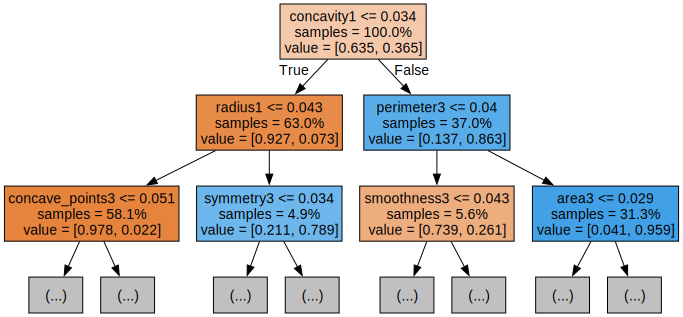

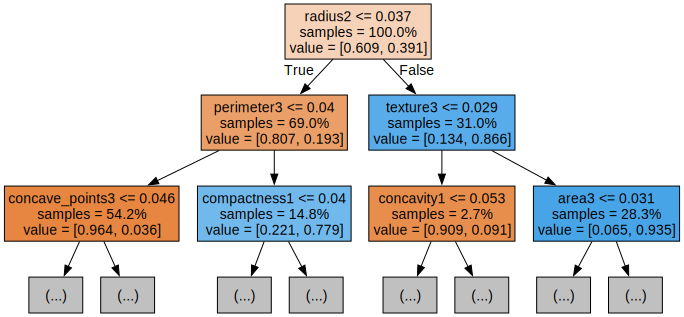

In [38]:
#Visualizing Results of the Random Forest Classifier
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

## Performance Metrics Random Forest

In [40]:
#Accuracy Estimator
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9473684210526315


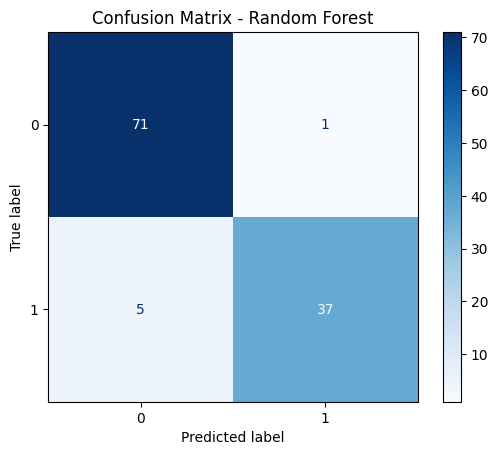

In [42]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display with blue colormap and formatted values
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # 'd' for integer display
plt.title("Confusion Matrix - Random Forest")
plt.show()

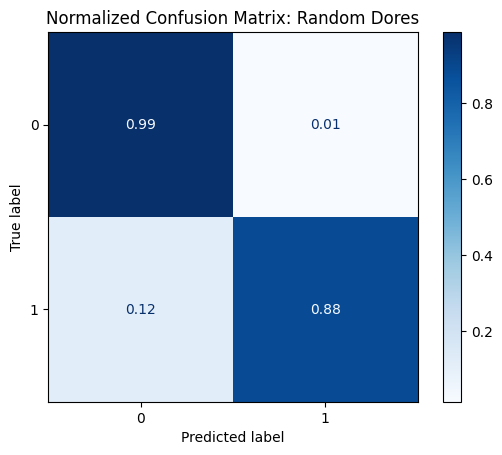

In [43]:
#Normalized Confusion Matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
disp.plot(cmap='Blues', values_format='.2f')  # Format as float
plt.title("Normalized Confusion Matrix: Random Dores")
plt.show()


add comments between sections and paragraph couple of sentences about the datasets, tie it together and 